# **Expected Punt Yards**

 In this project, we will explore two new metrics to evaluate punters and punting units: **Kick Yards over Expected** (KYOE) and **Net Yards over Expected** (NYOE). We will explain the motivation behind these statistics and show results from applying these metrics to the 2018-2020 seasons. We will then indicate possible future improvements and share the math behind these figures. 
 
## **Motivation**

Currently, there are very few stats used to evaluate NFL punters. Most punters are evaluated on a combination of common statistics such as:
* Average punt distance
* Longest punt distance
* Number of punts inside the 10 yard line


However, these stats fail to take into account the situations of each punt. For instance, we would expect different results when kicking from your 30 yardline as opposed to the opponent’s 40. 

In order to effectively evaluate a punter, one needs to know how well he does relative to other punters. This can be done by calculating the expected punt that an average NFL punter would have in a given situation and compare the punter to that statistic. 

By doing this, one can create a comprehensive statistic to evaluate punters: **Kick Yards over Expected**, which estimates how many yards better or worse a certain punter is versus the average NFL punter. One could also calculate an analogous catch-all statistic for punt units: **Net Yards Over Expected**, which is similar to KYOE but takes into account return yardage. 


## **Results**

AAs proof of concept, we used our models (see sections below for methodology) to rank punters (using KickYards over Expected) and punt and punt return units (using NetYards over Expected) for the 2018-2020 seasons. 

For punters with at least 50 punts between 2018-2020, our top five punters, as ranked by Average KickYards over Expected, were:

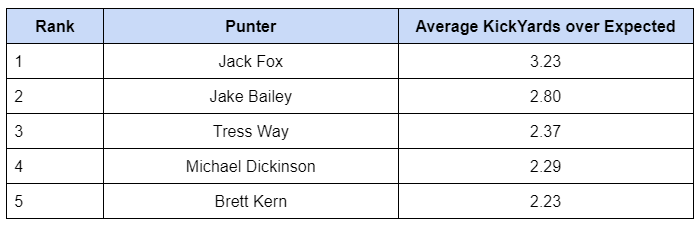

All five of these punters were either Pro Bowlers or First Team All-Pro at some point over the three years (Note: Jack Bailey did not play in 2018 and Jack Fox did not play in 2018 or 2019).

For punt units, the top five teams between 2018 and 2020, as ranked by Average NetYards over Expected were:

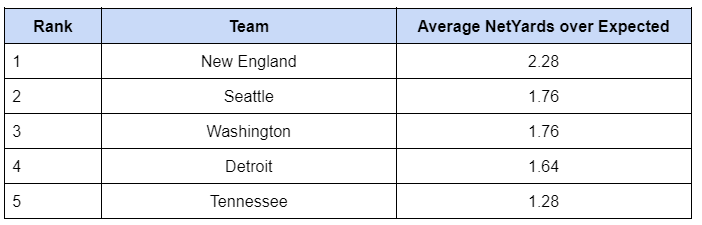

And the top five return units, as ranked by lowest Opposing Team NetYards over Expected:

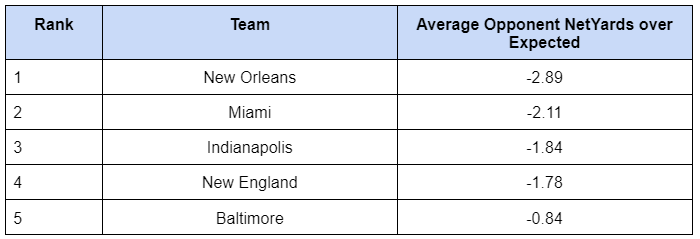

## **Discussion**

As shown above, the best punters and punt units kick the ball 2-3 yards farther than expected, and the best punt return units hold teams 2-3 yards under expected. In the dataset, there was an average of around 8 punts per game. This means that teams that excel in both punting and punt returning (such as New England) will expect to be about 15 yards per game better than expected.


## **Conclusion**

The new statistics we have outlined in this paper can be used as a one-size-fits-all statistic to rank punters (using average KickYards over expected) and punting units (using average NetYards over expected) over an entire season. Each stat can also act as a tool to quantitatively measure how “good” each individual punt is. 

## **Possible Improvements**

We believe these statistics can be improved in multiple ways. In the future, these statistics could account for the opposing team. Opposing teams could affect the numbers for various reasons: KYOE could be lower against teams that provide more pressure, and NYOE could be higher against return units that block less. 

Another desirable enhancement for these statistics would be taking the hang time of each punt into account. A higher hang time generally means a shorter return distance. Using this data would help us better predict the “expected” distance of any given punt. However, to do so, a new model for the expected hang time would be required. Then, one could compare a punter’s KYOE with their “hang time over expected”.

Another possible way to account for hang time would be to create an expected return distance from the time the punt returner receives the ball, similar to the past NFL Big Data Bowl project for expected rushing yards.

# **Methodology**

In order to calculate these KYOE and NYOE, we had to first figure out how to calculate the expected KickYards and the expected NetYards. 

## **Kick Yards Expected (KYE)**

The purpose of the Kick Yards Expected metric is to remove all statistical error from punts that do not occur as a result of the players on the field. In short, we want this statistic to take into account the things that players cannot control–such as field position and weather–so that results only vary because of the skill level of the punting or receiving units.

## **KickYards (KY)**

KickYards is the measure of how far the punter kicked the ball. In theory, this statistic is good for evaluating punters since there would be limited errors contributed by the kicking or receiving units. The drawback is that this statistic does not take the return into account. This is problematic since the punter’s job is not just to kick the ball as far as possible, but to kick it as far as possible while minimizing the possible return yards.

In order to minimize the return yardage, the punters will often kick the ball higher, decreasing the distance the ball travels, but increasing the amount of time the ball is in the air (hang time), giving their unit more time to get down the field and cover the punt. Omission of hang time means that this statistic is not perfect for evaluating punters.

Pros: Limited error from punting/kicking units <br />
Cons: Does not take return into account 

## **Net Yards Expected**

Net Yards Expected (NYE) is an analogous statistic to KYE. Its goal is the same: isolate the skill of the players on the field from the game situation. However, NYE takes into account return yards, allowing one to use it to analyze punt units and punt return units as a whole. 


## **NetYards (NY)**

NetYards is the measure of how far the punter kicked the ball less the return yardage (not taking into account penalties). Calculating expected NY indirectly accounts for hangtime by including the return distance of the receiving unit. We chose to omit penalty yardage since we assumed penalties are independent of the two errors we are correction for: field position and weather.

However, this does not entirely fix the problem, because it introduces new errors from the kicking and receiving teams. For instance, a punter on a team with a bad punt unit will likely have higher return yardage (due to missed tackles or poor coverage) than on a team with a good punting unit. Therefore, we believe this statistic is more indicative of the strength of a punting unit as a whole, and is better used to compare punting/receiving units than to compare punters.

Pros: Takes return into account<br />
Cons: Introduces errors from punting unit

For this project, we looked at both KickYardsOverExpected (as a metric to compare individual punters) and NetYardsOverExpected (as a metric to compare kicking units).

## **Getting Weather Data**

As stated above, the purpose of these statistics is to account for any errors that result outside of the control of those on the punting/receiving units (namely field position and weather). 

Since weather data was not included in the competition data, we scraped it from a website called [nflweather.com](nflweather.com), which has data on temperature, wind, precipitation, and many other types of weather data for NFL games.

To account for wind direction, we used a combination of google earth, stadium seating charts, tracking data (to get play direction), and data from [this blog](https://vizual-statistix.tumblr.com/post/126425452261/football-announcers-often-mention-a-player) to account for the direction of play in each stadium, which we then used to split the absolute wind speed and direction (such as 2mph NW) into tail and side wind (tail wind is wind in the direction the punter is facing, and side wind is the wind blowing left to right from the punter’s POV). Since the blog was written in 2015, we had to manually add data for the Chargers, Rams, and Raiders. Additionally, we assumed the wind speed in dome stadiums was 0. 

## **Calculating Expected KickYards and Expected NetYards**

We attempted many different models to predict expected KickYards and Expected NetYards. In order to limit overfitting, we tested each model using a 4-fold cross validation, and we compared these models by calculating an average MAPE (mean average percent error) for each model across the 4 trials.

The two models that we used for the final results consistently outperformed the rest: a naive model (which only took into account the position on the field), and a neural network that included both field position and weather data.

## **Naive model**

Our naive model calculated KickYards and NetYards by taking the average of every punt that occurred from 2018-2020 from +/- 1 yard around the line of scrimmage. This model had an average MAPE of 15.8% for KickYards and 25.3% for the NetYards. As discussed above, this difference in MAPE is expected since NetYards also takes the return yardage into account.

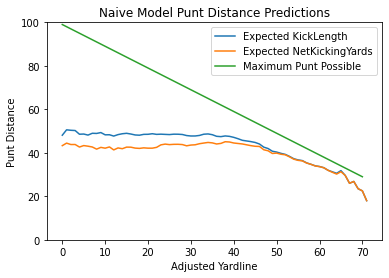<br />
*Note: Adjusted Yardline is how many yards you are away from your endzone. For instance, kicking from your 20 would be an adjusted yardline of 20, and kicking from your opponent’s 40 would be an adjusted yardline of 60. Adjusted yardline maxes out at 70 since there are few punts from inside the opponent’s 30 yardline.*

The graph shows when kicking from within your own 40, punts on average travel about 50 yards in the air, and on average they are returned between 5 and 10 yards. Once past the kicking team’s 40 yardline, the punt distance gets smaller, since the punt is now limited by the distance to the opponent’s endzone. The return yards also trend towards 0, which makes sense since shorter punts mean longer hangtime; therefore it is more likely the returner does a fair catch or does not catch the ball. All of these results make sense and are encouraging that this model is a good predictor of KickYards and NetYards.

However, this model is not very smooth, which is indicative that it may be slightly overfit to the data. Nevertheless, this model performs extremely well, especially considering it does not take weather effects into account.

## **MLP Regressor (Neural Network)**

Our MLP (multi-layer perceptron) model calculated expected KickYards and Expected NetYards by training a neural network on the punting data, which included features for the weather and the yardline that the ball was being kicked from. This model had an average MAPE of 15.7% for KickYards and 25.2% for the NetYards, both of which are slightly better than the naive model.

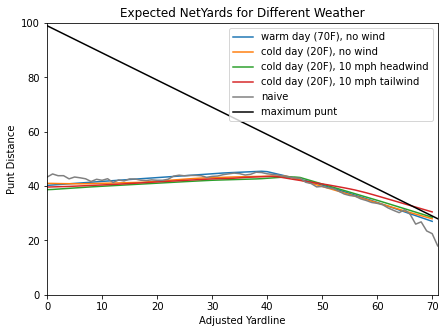<br />
*This graph shows the difference in expected NetYards for different weather, and also includes the naive prediction in gray, and the maximum possible punt in black.*

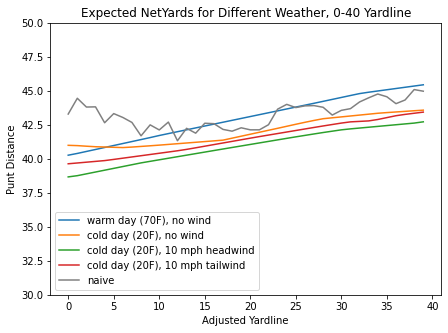<br />
*From within the kicking team’s 40 yardline, we can see that we expect a punt unit to punt about 3 yards farther on a warm day as a cold day. We also see that the neural network is not as accurate when a team is punting from within their 10 yardline.*

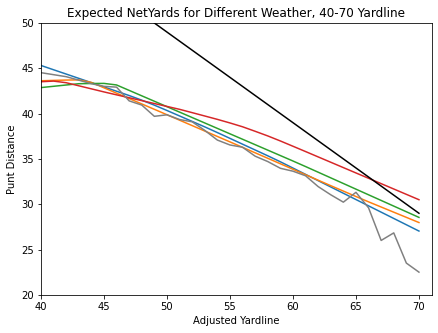<br />
*For past the kicking team’s 40 yardline, we can see that we expect a punt unit to punt about the same on a warm day as a cold day. We also see that the neural network is not as accurate when a team is punting from within their opponent’s 35 yardline.*

The predictions for KickYards closely follow the patterns for the NetYards in the graphs shown above, and those models were omitted for brevity.

We can see that the MLP model takes into account weather effects, but it is not accurate for punts from within a team’s 10 yardline or the opponent’s 35 yardline; however, those only account for 4.5% of all punts.

We chose to use the MLP Classifier to calulate the Exptected KickYards and NetYards statistics even though it has only a slightly better MAPE than the naive model because we felt that the naive model was possibly overfit, and also did not take into account weather effects.

# Appendix with link to code

Note: This was done using Google Colab, and code can be found [here](https://colab.research.google.com/drive/11hKv8IJj7rSE5EXsnPZe-XQtHnzS3As-?usp=sharing)

You can also find access to the weather and stadium orientation data we scraped [here](https://drive.google.com/drive/folders/1P1SI4LKzMDrjgHtIofzkV0KAHMXoAHbE?usp=sharing)